# This script can be used for comparing WRF model output with California Air Resources Board (CARB) data.
## The CARB data can be downloaded from the following link, which contains MET data across California since 1980 to present.

https://www.arb.ca.gov/aqmis2/download/met_data/met_data-20230130.zip

Written by:
Sagar P Parajuli, SDSU




In [8]:

# First read CARB station data

import pandas as pd

# Read the CSV file into a pandas DataFrame
ws_2020 = pd.read_csv(r'/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Station_data/ws_scalar.2020/ws_scalar.2020.csv')
ws_2020.head()


# Extract rows where county_name is equal to 'Imperial' only

ws_2020_imp = ws_2020[ws_2020['county_name'] == 'Imperial']
del ws_2020
# Extract rows where obs_type is equal to 'H' corresponding to hourly data from ws_2020_imp
ws_2020_imp_hourly = ws_2020_imp[ws_2020_imp['obs_type'] == 'H']
del ws_2020_imp
print(ws_2020_imp_hourly.head())



       county_name          name    site      aqs_id        date  start_hour  \
342070    Imperial  Bombay Beach  5407.0  60255501.0  2020-01-01         0.0   
342071    Imperial  Bombay Beach  5407.0  60255501.0  2020-01-01         1.0   
342072    Imperial  Bombay Beach  5407.0  60255501.0  2020-01-01         2.0   
342073    Imperial  Bombay Beach  5407.0  60255501.0  2020-01-01         3.0   
342074    Imperial  Bombay Beach  5407.0  60255501.0  2020-01-01         4.0   

       obs_type    obs  quality   latitude   longitude  elevation  \
342070        H  1.496      0.0  33.352636 -115.734192      -60.0   
342071        H  1.081      0.0  33.352636 -115.734192      -60.0   
342072        H  0.999      0.0  33.352636 -115.734192      -60.0   
342073        H  2.114      0.0  33.352636 -115.734192      -60.0   
342074        H  3.108      0.0  33.352636 -115.734192      -60.0   

                      address          city  zip_code  
342070  A Street & 3rd Street  Bombay Beach   92

In [9]:
# find the unique stations inside the Imperial County, this will be used for plotting stations later

unique_county_names = ws_2020_imp_hourly['name'].unique()
unique_county_names

unique_stations = ws_2020_imp_hourly[['name', 'latitude', 'longitude']].drop_duplicates()
unique_stations

,name,latitude,longitude
342070,Bombay Beach,33.352636,-115.734192
375479,Naval Test Base,33.169226,-115.855927
383898,Salton City,33.272754,-115.900616
392401,Sonny Bono,33.176383,-115.623100


In [10]:
# Extract only April data from station data and fill date/data gaps with NaNs

#station_detail = ws_2020_imp_hourly_apr[ws_2020_imp_hourly_apr['name'] == 'Bombay Beach']

import numpy as np

from datetime import datetime

# Select rows between April 1 and April 30, 2020
start_date = '2020-04-01'
end_date = '2020-04-30'

mask = (ws_2020_imp_hourly['date'] >= start_date) & (ws_2020_imp_hourly['date'] <= end_date)

# Extract rows between the specified date range
ws_2020_imp_hourly_apr = ws_2020_imp_hourly.loc[mask]

ws_2020_imp_hourly_apr = ws_2020_imp_hourly_apr.copy() # this was necessary to avoid an error which didn't allow adding 'datetime' column
ws_2020_imp_hourly_apr['datetime'] = pd.to_datetime(ws_2020_imp_hourly_apr['date']) + pd.to_timedelta(ws_2020_imp_hourly_apr['start_hour'], unit='h')

# Resample station data to make hourly

# Select rows between April 1 and April 30, 2020
start_date = '2020-04-01'
end_date = '2020-04-30'

mask = (ws_2020_imp_hourly['date'] >= start_date) & (ws_2020_imp_hourly['date'] <= end_date)

# Extract rows between the specified date range
ws_2020_imp_hourly_apr = ws_2020_imp_hourly.loc[mask]
ws_2020_imp_hourly_apr['datetime'] = pd.to_datetime(ws_2020_imp_hourly_apr['date']) + pd.to_timedelta(ws_2020_imp_hourly_apr['start_hour'], unit='h')
ws_2020_imp_hourly_apr

ws_2020_imp_hourly_apr.set_index('datetime', inplace=True)
ws_2020_imp_hourly_apr

print(ws_2020_imp_hourly_apr.columns)
hourly_resampled_data_stns = ws_2020_imp_hourly_apr.groupby(['name', 'datetime'])['obs'].mean().unstack()
hourly_resampled_data_stns_array = hourly_resampled_data_stns.to_numpy()
#hourly_resampled_data_stns_array = np.delete(hourly_resampled_data_stns_array, [4], axis=0) # Squawk lake deleted because it has all nans

print(hourly_resampled_data_stns_array.shape)

hourly_resampled_data_stns # display this to check whether all stations have good data

Index(['county_name', 'name', 'site', 'aqs_id', 'date', 'start_hour',
       'obs_type', 'obs', 'quality', 'latitude', 'longitude', 'elevation',
       'address', 'city', 'zip_code'],
      dtype='object')
(4, 720)


<ipython-input-10-46e16af75573>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws_2020_imp_hourly_apr['datetime'] = pd.to_datetime(ws_2020_imp_hourly_apr['date']) + pd.to_timedelta(ws_2020_imp_hourly_apr['start_hour'], unit='h')


datetime,2020-04-01 00:00:00,2020-04-01 01:00:00,2020-04-01 02:00:00,2020-04-01 03:00:00,2020-04-01 04:00:00,2020-04-01 05:00:00,2020-04-01 06:00:00,2020-04-01 07:00:00,2020-04-01 08:00:00,2020-04-01 09:00:00,...,2020-04-30 14:00:00,2020-04-30 15:00:00,2020-04-30 16:00:00,2020-04-30 17:00:00,2020-04-30 18:00:00,2020-04-30 19:00:00,2020-04-30 20:00:00,2020-04-30 21:00:00,2020-04-30 22:00:00,2020-04-30 23:00:00
name,,,,,,,,,,,,,,,,,,,,,
Bombay Beach,2.159,0.889,2.044,1.396,0.827,1.314,1.953,1.671,1.973,1.283,...,1.583,2.129,1.402,1.155,0.565,0.716,0.320,1.671,1.975,2.041
Naval Test Base,1.070,2.871,2.702,3.271,2.421,1.170,1.260,0.032,0.249,0.366,...,2.335,2.263,3.031,2.689,3.015,2.368,1.007,3.360,6.246,4.332
Salton City,0.476,2.208,1.993,1.777,2.044,1.641,2.445,0.892,0.847,1.397,...,1.743,2.266,2.732,2.347,1.702,0.649,2.387,2.901,3.201,3.689
Sonny Bono,2.201,2.127,1.860,1.056,1.871,2.001,2.007,2.377,1.940,1.521,...,1.755,1.111,1.513,2.426,2.083,2.528,2.476,2.941,2.558,3.578


In [11]:
!pip install netCDF4 numpy
import netCDF4 as nc
from scipy.ndimage import shift

file_path_1 = '/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_fine_select_new.nc'  # Update with the actual path

# Open the NetCDF file
data_1 = nc.Dataset(file_path_1, mode='r')
print(data_1.variables.keys()) # variable names

# Now read WRF model outputs and process them for April

!pip install netCDF4 numpy
import netCDF4 as nc
from scipy.ndimage import shift


# Read NetCDF files for lat and lon
lat_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_fine_select_new.nc')
long_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_fine_select_new.nc')
lat = lat_dataset['XLAT'][:]
lon = long_dataset['XLONG'][:]
print(lat.shape)
print(lon.shape)

# Read NetCDF file for u component first, for 'fine' and 'sensor' model data
u_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_fine_select_new.nc')
u_20 = u_dataset['u10'][:]; del u_dataset;
print(u_20.shape)
u_20_aug_fine = u_20[168:888, :, :]; del u_20;
u_20_20_aug_fine = shift(u_20_aug_fine, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(u_20_aug_fine.shape)


u_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
u_20 = u_dataset['u10'][:]; del u_dataset;
print(u_20.shape)
u_20_aug_sensor = u_20[168:888, :, :]; del u_20;#
u_20_20_aug_sensor = shift(u_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(u_20_aug_sensor.shape)

# Now read v component for 'fine' and 'sensor' data
v_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_fine_select_new.nc')
v_20 = v_dataset['v10'][:]; del v_dataset;
print(v_20.shape)
v_20_aug_fine = v_20[168:888, :, :]; del v_20;
v_20_20_aug_fine = shift(v_20_aug_fine, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(v_20_aug_fine.shape)


v_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
v_20 = v_dataset['v10'][:]; del v_dataset;
print(v_20.shape)
v_20_aug_sensor = v_20[168:888, :, :]; del v_20;#
v_20_20_aug_sensor = shift(v_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(v_20_aug_sensor.shape)

# Now calculate wind speed for 'fine' and 'sensor' data using the respective u and v components

ws_20_aug_fine = np.sqrt(u_20_20_aug_fine**2+v_20_20_aug_fine**2);
ws_20_aug_sensor = np.sqrt(u_20_20_aug_sensor**2+v_20_20_aug_sensor**2);


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.1 MB/s eta 0:00:00
dict_keys(['XTIME', 'XLONG', 'XLAT', 'sinalpha', 'cosalpha', 'q2', 't2', 'etran', 'u10', 'v10'])
(171, 162)
(171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)


In [12]:
# From the model outputs, extract grids corresponding to station location using great circle method

!pip install haversine
from haversine import haversine

# Reshape the latitude and longitude dimensions of data_array for broadcasting

lat_all = np.stack([lat.ravel()]).T;
lon_all = np.stack([lon.ravel()]).T;

print(lat_all.shape)
print(lon_all.shape)

comb_lat_lon = np.concatenate((lat_all, lon_all), axis=1)
print(comb_lat_lon.shape)


# Calculate great circle distances for all station and grid point pairs
station_lat = unique_stations[['latitude']].values
station_lon = unique_stations[['longitude']].values

station_lat_lon = np.concatenate((station_lat, station_lon), axis=1)
print(station_lat_lon.shape)
#station_lat.shape

max_lat = max(lat_all)
print(max_lat)

from haversine import haversine_vector, Unit

#distances = haversine_vector([station_lat_lon[1,:]], [comb_lat_lon[1,:]], Unit.DEGREES, comb=True)


# Initialize an array to store the distances, there are only 4 stations for wind speed

distances = np.zeros((4, 27702))

# Loop through each pair of coordinates
for i in range(4):  # the first dimension in station_lat_lon
    for j in range(27702):  # the first dimension in comb_lat_lon
        # Compute haversine distance for the current pair of coordinates
        distances[i, j] = haversine_vector([station_lat_lon[i, :]],
                                           [comb_lat_lon[j, :]],
                                           Unit.DEGREES,
                                           comb=True)


# Find the index of the minimum distance for each station
min_distance_indices = np.argmin(distances, axis=1)
min_distance_indices
# Convert the 1D indices to multidimensional indices
indices = np.unravel_index(min_distance_indices, [171, 162])
indices

# Extract data for the closest grid points

closest_data_fine = ws_20_aug_fine[:, indices[0], indices[1]]
closest_data_fine.shape
closest_data_fine_new = closest_data_fine.T
#closest_data_fine_new = np.delete(closest_data_fine_new, [4], axis=0) #  Squaw lake stn missing data
print(closest_data_fine_new.shape)

closest_data_sensor = ws_20_aug_sensor[:, indices[0], indices[1]]
closest_data_sensor.shape
closest_data_sensor_new = closest_data_sensor.T
#closest_data_sensor_new = np.delete(closest_data_sensor_new, [4], axis=0) # Squaw lake stn missing data
print(closest_data_sensor_new)

(27702, 1)
(27702, 1)
(27702, 2)
(4, 2)
[34.111755]
(4, 720)
[[2.081061  2.3671606 2.6569207 ...       nan       nan       nan]
 [2.4669826 2.512246  2.5403497 ...       nan       nan       nan]
 [3.2183714 3.1860785 3.1009104 ...       nan       nan       nan]
 [1.7317919 1.896082  2.2383308 ...       nan       nan       nan]]


In [13]:
station_names = list(hourly_resampled_data_stns.index)
station_names

['Bombay Beach', 'Naval Test Base', 'Salton City', 'Sonny Bono']

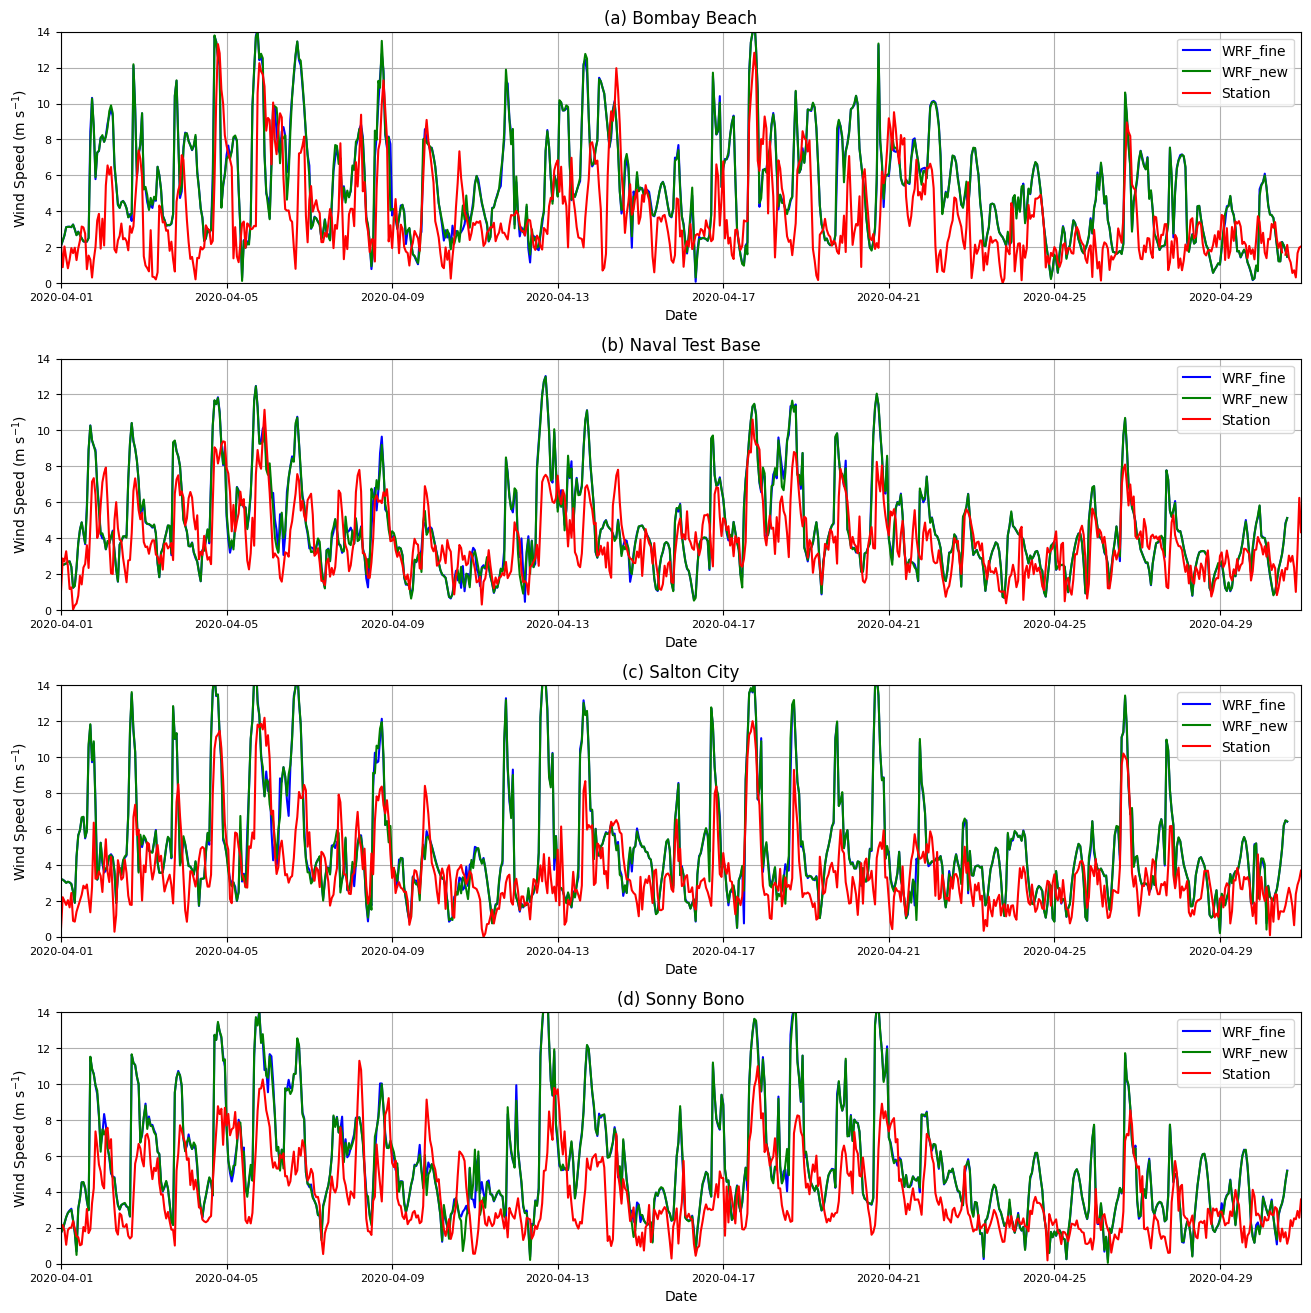

In [16]:
# plot comparision figures for all stations

import matplotlib.pyplot as plt
import numpy as np
# Select rows between April 1 and April 30, 2020

start_date = np.datetime64('2020-04-01 00:00')
end_date = np.datetime64('2020-04-30 23:00')
step_size = np.timedelta64(1, 'h')
dates = np.arange(start_date, end_date + step_size, step_size)

fig, axs = plt.subplots(4, 1, figsize=(16, 16))
plt.subplots_adjust(hspace=0.3)

# Extract station names for plotting

station_names = list(hourly_resampled_data_stns.index)
#del station_names[8], station_names[1] # delete Buttercup and Squaw lake


station_names

#station_names = ["Bombay Beach", "Buttercup", "Cahuilla", "El Centro-9th Street", "Naval Test Base", "Niland-English Road", "Salton City", "Sonny Bono", "Westmorland-W 1st Street"]

for i, ax in enumerate(axs):
    ax.plot(dates[:], np.ma.masked_invalid(closest_data_fine_new[i, :]), label='WRF_fine', marker='', linestyle='-', color='blue')
    ax.plot(dates[:], np.ma.masked_invalid(closest_data_sensor_new[i, :]), label='WRF_new', marker='', linestyle='-', color='green')
    ax.plot(dates[:], np.ma.masked_invalid(hourly_resampled_data_stns_array[i, :]), label='Station', marker='', linestyle='-', color='red')

    ax.set_title(f'({chr(ord("a") + i)}) {station_names[i]}')
    ax.set_xlabel('Date')
    ax.set_xlim([start_date, end_date])
    ax.tick_params(axis='x', labelrotation=0)
    ax.set_ylabel('Wind Speed (m s$^{-1}$)')
    ax.tick_params(axis='both', labelsize=8)
    ax.grid(True)
    ax.legend(loc='upper right')
    ax.set_ylim(0, 14)

plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/timeseries_model_station.png', bbox_inches='tight', dpi=400)

plt.show()


In [17]:
# Calculate pearson correlation using scipy

import numpy as np
from scipy import stats

# Lists to store results
all_model_fine_stn_r = []
all_model_fine_stn_p = []

for j in range(0, 4):
    valid_indices = ~np.isnan(closest_data_fine_new[j, :]) & ~np.isnan(hourly_resampled_data_stns_array[j, :])
    model_fine_stn_r, model_fine_stn_p = stats.pearsonr(closest_data_fine_new[j, valid_indices], hourly_resampled_data_stns_array[j, valid_indices])

    # Save results to lists
    all_model_fine_stn_r.append(model_fine_stn_r)
    all_model_fine_stn_p.append(model_fine_stn_p)

all_model_sensor_stn_r = []
all_model_sensor_stn_p = []

for j in range(0, 4):
    valid_indices = ~np.isnan(closest_data_sensor_new[j, :]) & ~np.isnan(hourly_resampled_data_stns_array[j, :])
    model_sensor_stn_r, model_sensor_stn_p = stats.pearsonr(closest_data_sensor_new[j, valid_indices], hourly_resampled_data_stns_array[j, valid_indices])

    # Save results to lists
    all_model_sensor_stn_r.append(model_sensor_stn_r)
    all_model_sensor_stn_p.append(model_sensor_stn_p)

all_model_sensor_stn_r

[0.4796320068530115,
 0.6638468016142745,
 0.5718721244705894,
 0.6416771538580781]

In [18]:
# Calculate RMSE

import numpy as np
from sklearn.metrics import mean_squared_error

# RMSE is the standard deviation of the residuals

residuals_fine_stn = (closest_data_fine_new - hourly_resampled_data_stns_array)
rmse_fine_stn = np.nanstd(residuals_fine_stn, axis=1)
print(rmse_fine_stn.shape)

residuals_sensor_stn = (closest_data_sensor_new - hourly_resampled_data_stns_array)
rmse_sensor_stn = np.nanstd(residuals_sensor_stn, axis=1)
print(rmse_sensor_stn.shape)
rmse_sensor_stn


(4,)
(4,)


array([2.77999512, 1.93642013, 2.55262708, 2.33679882])

In [19]:
# create a new dataframe by putting together all Rho and RMSE data against stations

corr_rmse_stations = pd.DataFrame({"Rho:WRF_fine": all_model_fine_stn_r, 'Rho:WRF_new': all_model_sensor_stn_r, 'P-value:WRF_fine': all_model_fine_stn_p, 'P-value:WRF_new': all_model_sensor_stn_p, 'RMSE:WRF_fine': rmse_fine_stn, 'RMSE:WRF_new': rmse_sensor_stn}, index=station_names)
corr_rmse_stations.index.name = 'Station'
corr_rmse_stations

,Rho:WRF_fine,Rho:WRF_new,P-value:WRF_fine,P-value:WRF_new,RMSE:WRF_fine,RMSE:WRF_new
Station,,,,,,
Bombay Beach,0.481216,0.479632,1.734134e-42,3.508542e-42,2.768726,2.779995
Naval Test Base,0.664124,0.663847,9.281296e-92,1.172942e-91,1.940166,1.936420
Salton City,0.574374,0.571872,9.862191e-64,4.511466e-63,2.532088,2.552627
Sonny Bono,0.646792,0.641677,1.325153e-85,7.287428e-84,2.319484,2.336799
